In [396]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [397]:
# import data visualisation tools
import matplotlib.pyplot as plt
from matplotlib import pylab
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns

In [398]:
# import and view first 10 items of file
url = "/Users/arpanganguli/Documents/Finance/ISLR/Datasets/Auto.csv"
Auto = pd.read_csv(url)

In [399]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [400]:
list(Auto)

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin',
 'name']

In [401]:
Auto = Auto.drop(Auto.index[[32, 126, 330, 336, 354]])

**Removing rows containing "?". This is the easy way out. Such missing values need to be explored first in a real life 
situation.**

In [402]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null object
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


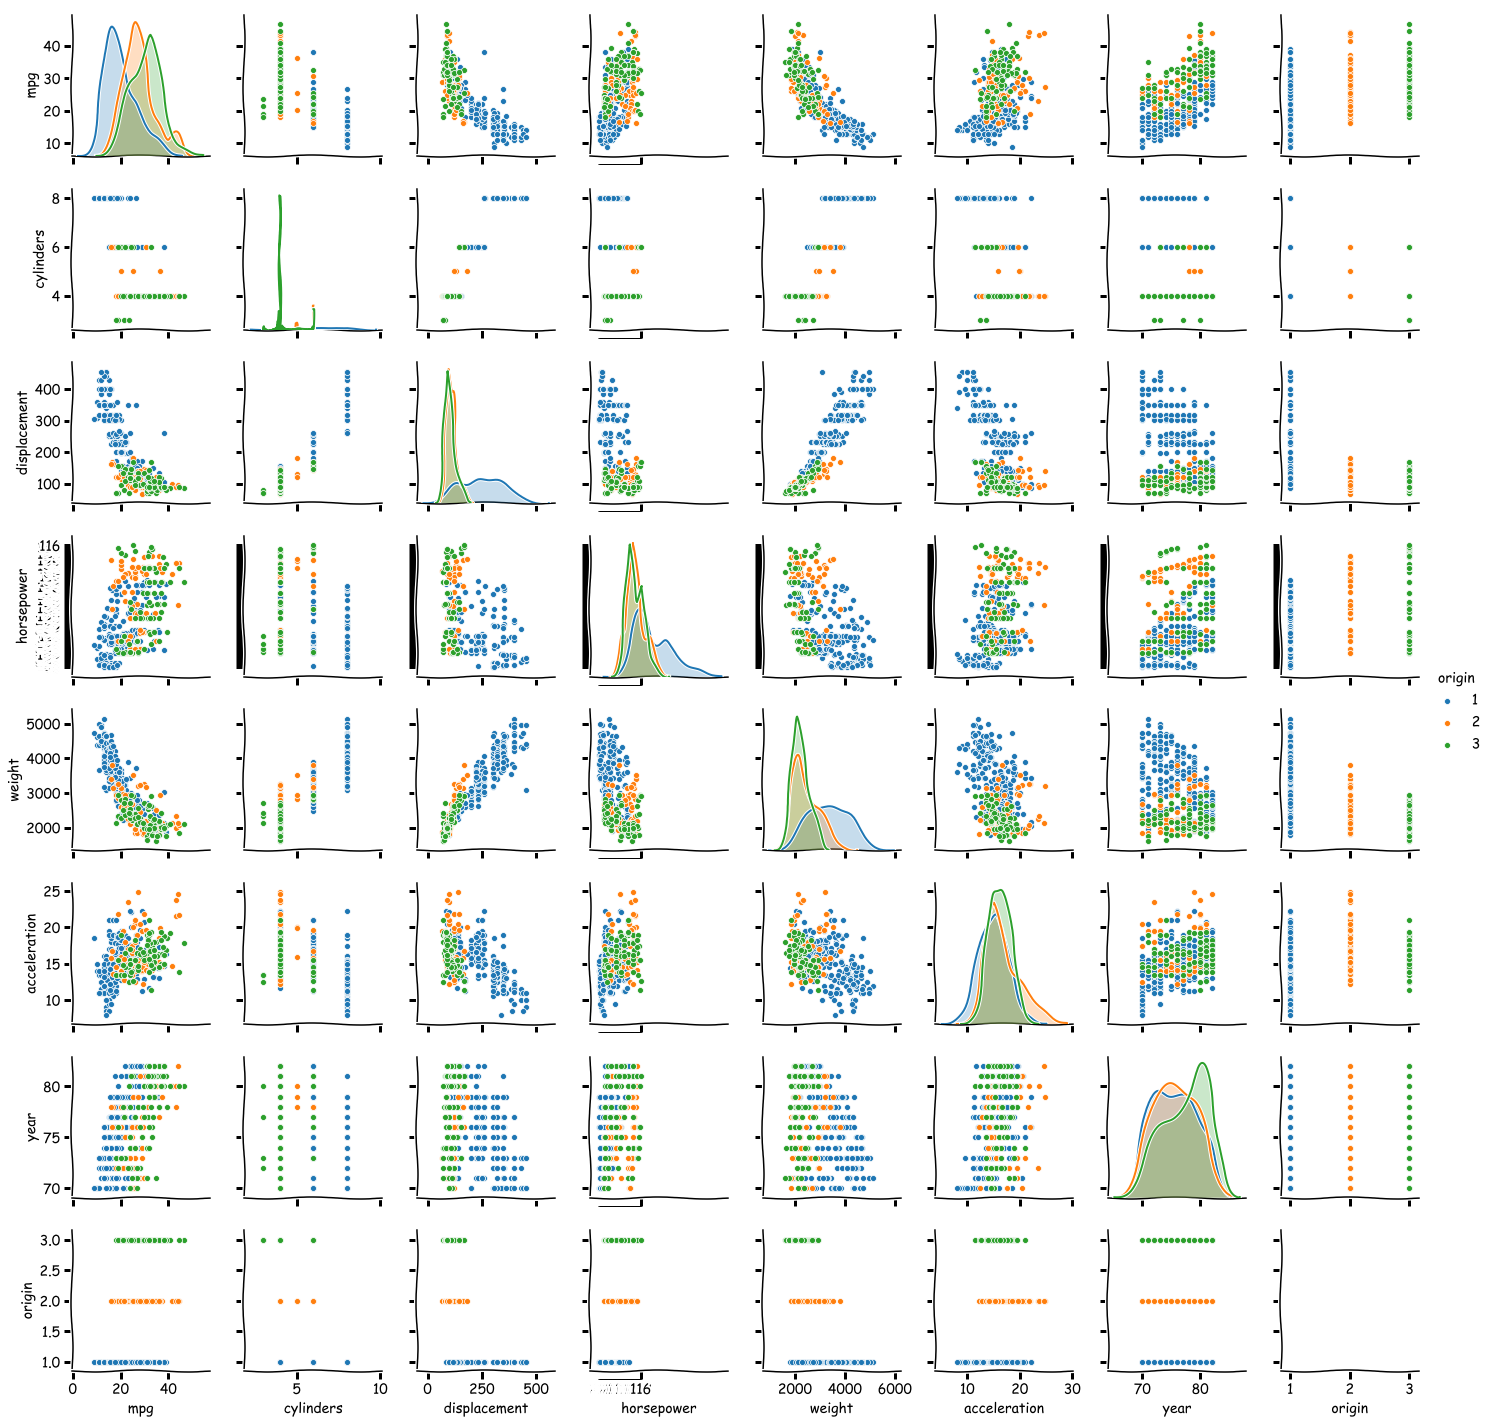

In [403]:
# 9.a. Scatterplot Matrix
sns.pairplot(Auto, hue = "origin")

In [405]:
# 9.b. Correlation Matrix
Auto.corr()

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.932994,-0.543800,-0.369855,-0.614535
weight,-0.832244,0.897527,0.932994,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.585005,0.212746,0.181528,1.000000


In [407]:
# 9.c. Run multivariate regression
Auto['hp'] = Auto['horsepower'].astype(float)

**For some annoying reason, Python is importing the horsepower column as string and not float. This will impact the 
regression results since we cannot regress string values. So, I am converting this column into float and storing the
values in to a new column called "hp". I will use the values in "hp" to regress "mpg".**

In [408]:
X = Auto[['cylinders', 'displacement', 'hp', 'weight',
       'acceleration', 'year', 'origin']]
Y = Auto['mpg']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

In [409]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 09 Jan 2019   Prob (F-statistic):          2.04e-139
Time:                        23:31:55   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
hp              -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [410]:
# 9.e. & 9.f. Run multivariate regression with interaction terms and transformations
X1 = Auto['hp']
X2 = Auto['weight']
X3 = Auto['acceleration']
X4 = Auto['year']
X5 = Auto['origin']
X6 = Auto['displacement']
X7 = Auto['cylinders']
Y = Auto['mpg']
reg = ols("Y~X1+X2+X3+X4+X5+X6+X7+X7*X6+X7*X2+X6*X2", data = Auto).fit()

**There is no pure statistical method to assess interaction terms. ISLR  provides some clever examples to deduce this. But ultimately, it will depend
on chopping and changing between different independent variables depending on your research goals. This question on Stats Stack Exchange provides an
excellent answer - http://bit.ly/2ApTvQ4
<br><br>
For the sake of brevity, I have included interactions between terms with higest covariance amongst them.**

In [411]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     232.0
Date:                Wed, 09 Jan 2019   Prob (F-statistic):          2.98e-155
Time:                        23:33:06   Log-Likelihood:                -977.34
No. Observations:                 392   AIC:                             1977.
Df Residuals:                     381   BIC:                             2020.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.8302      6.090     -1.122      0.263     -18.805       5.144
X1            -0.0355      0.013     -2.693      0.007      -0.061      -0.010
X2            -0.0093      0.002     -3.929      0.000      -0.014      -0.005
X3             0.0603      0.089      0.677      0.499      -0.115       0.235
X4             0.7831      0.046     17.120      0.000       0.693       0.873
X5             0.5193      0.271      1.919      0.056      -0.013       1.051
X6            -0.0859      0.031     -2.738      0.006      -0.148      -0.024
X7             0.5961      1.536      0.388      0.698      -2.423       3.616
X7:X6          0.0019      0.003      0.622      0.535      -0.004       0.008
X7:X2         -0.0003      0.001     -0.498      0.618      -0.001       0.001
X6:X2       2.386e-05   6.16e-06      3.872      0.000    1.17e-05     3.6e-05
==============================================================================
Omnibus:                       45.965   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.574
Skew:                           0.628   Prob(JB):                     2.39e-22
Kurtosis:                       5.125   Cond. No.                     3.48e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [412]:
reg = ols("Y~X1+X2+X3+X4+X5+X6+X7+I(np.log(X1))+I(X4^2)", data = Auto).fit()

**I randomly chose two transformations for two variables:**
<br>
**1. Log-transformation for X1: OLS result suggests that for a unit change in log(X1), the miles per gallon reduces by ~27.2 units**
<br>
**2. Square of X4: OLS result suggests that for a unit increase in X4^2, the miles per gallon reduces by 0.12 units. However, the high p-value of this statistic suggests that the null hypothesis cannot be rejected. Therefore, essentially there is no difference between this particular value and 0, and therefore this statistic can be discarded.**

In [413]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     261.1
Date:                Wed, 09 Jan 2019   Prob (F-statistic):          3.29e-157
Time:                        23:36:31   Log-Likelihood:                -975.60
No. Observations:                 392   AIC:                             1971.
Df Residuals:                     382   BIC:                             2011.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        87.4536     11.049      7.915      0.000      65.730     109.178
X1                0.1792      0.023      7.892      0.000       0.135       0.224
X2               -0.0033      0.001     -4.936      0.000      -0.005      -0.002
X3               -0.3322      0.097     -3.441      0.001      -0.522      -0.142
X4                0.8710      0.091      9.600      0.000       0.693       1.049
X5                0.9359      0.253      3.695      0.000       0.438       1.434
X6               -0.0053      0.007     -0.749      0.454      -0.019       0.009
X7               -0.0529      0.290     -0.182      0.856      -0.623       0.518
I(np.log(X1))   -27.1945      2.654    -10.247      0.000     -32.413     -21.976
I(X4 ^ 2)        -0.1245      0.076     -1.639      0.102      -0.274       0.025
==============================================================================
Omnibus:                       26.449   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.432
Skew:                           0.408   Prob(JB):                     1.84e-11
Kurtosis:                       4.537   Cond. No.                     2.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""